## Advertisement sale Prediction 

## Import Libraries

In [30]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## loading Data set

In [43]:
data = pd.read_csv('F:/PROJECTS/Advertisement Sale Prediction_Logistics regression/DigitalAd_dataset.csv')

## summary of the data

In [3]:
data.head()

,Age,Salary,Status
0,18,82000,0
1,29,80000,0
2,47,25000,1
3,45,26000,1
4,46,28000,1


In [8]:
data.isna().sum()

Age       0
Salary    0
Status    0
dtype: int64

In [11]:
data.dtypes

Age       int64
Salary    int64
Status    int64
dtype: object

In [13]:
data.shape

(400, 3)

In [14]:
data.describe()

,Age,Salary,Status
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [19]:
data['Status'] = data['Status'].astype('int')

In [28]:
data['Status'].value_counts()

0    257
1    143
Name: Status, dtype: int64

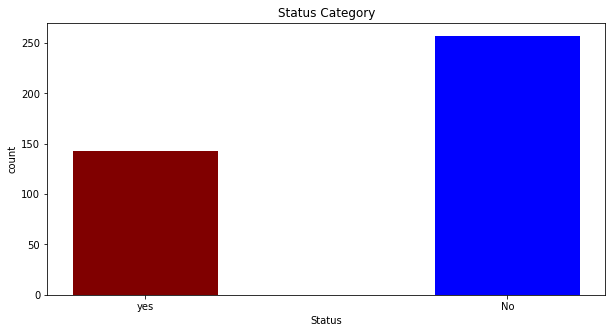

In [37]:
# creating the dataset
data = {"yes":143,"No":257}
Status = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(Status, values, color =('maroon','blue'),
        width = 0.4)
 
plt.xlabel("Status")
plt.ylabel("count")
plt.title("Status Category")
plt.show()


## Segregate Dataset into X(Input/IndependentVariable) & Y(Output/DependentVariable)

In [49]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

## Splitting dataset into train and test data 

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train,X_test, y_train, y_test = train_test_split(X,y, random_state = 0,test_size=0.25) 

## Feature Scaling
### we scale our data to make all the features contribute equally to the result
###Fit_Transform - fit method is calculating the mean and variance of each of the features present in our data
###Transform - Transform method is transforming all the features using the respective mean and variance, 
###We want our test data to be a completely new and a surprise set for our model

In [55]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [56]:
## Training the data set

from sklearn.linear_model import LogisticRegression
model  = LogisticRegression()
model.fit(X_train, y_train,)

LogisticRegression()

In [57]:
age = int(input("Enter New Customer Age: "))
sal = int(input("Enter New Customer Salary: "))
newCust = [[age,sal]]
result = model.predict(sc.transform(newCust))
print(result)
if result == 1:
  print("Customer will Buy")
else:
  print("Customer won't Buy")

Enter New Customer Age: 56
Enter New Customer Salary: 56000
[1]
Customer will Buy


In [58]:
y_pred = model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]]


In [59]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix: ")
print(cm)

print("Accuracy of the Model: {0}%".format(accuracy_score(y_test, y_pred)*100))

Confusion Matrix: 
[[61  0]
 [20 19]]
Accuracy of the Model: 80.0%
